C:\Users\jbertholat\AppData\Local\Temp\ipykernel_13792\3376895394.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


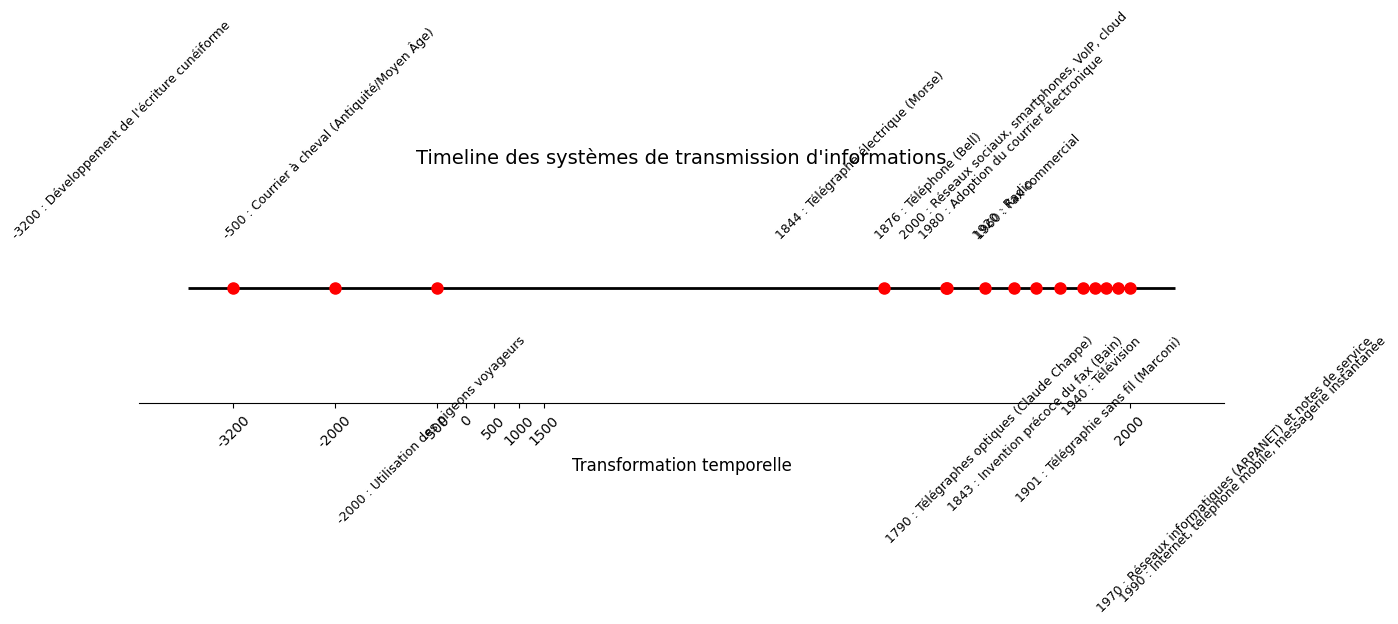

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les bornes temporelles et le pivot
min_year = -3200   # La plus ancienne date
pivot = 1500       # Date de transition
max_year = 2000    # La date la plus récente

# Paramètres pour la partie linéaire (après pivot)
# On choisit de placer pivot à f(pivot)=log(2)=0.6931
# On souhaite que max_year (2000) soit, par exemple, à 10.0 sur l'axe transformé.
f_pivot = np.log(1 + (pivot - min_year) / (pivot - min_year))  # log(2) ≈ 0.6931
target_positive = 2
scale = (target_positive - f_pivot) / (max_year - pivot)  # Nouveau coefficient pour la partie linéaire

def transform_year(x):
    """Transformation piecewise de l'année x.
    Pour x <= pivot, on utilise une échelle logarithmique qui compresse l'intervalle.
    Pour x > pivot, on utilise une échelle linéaire.
    """
    if x <= pivot:
        return np.log(1 + (x - min_year) / (pivot - min_year))
    else:
        return f_pivot + scale * (x - pivot)

# Liste des événements (année, description)
events = [
    (-3200, "Développement de l'écriture cunéiforme"),
    (-2000, "Utilisation des pigeons voyageurs"),
    (-500, "Courrier à cheval (Antiquité/Moyen Âge)"),
    (1790, "Télégraphes optiques (Claude Chappe)"),
    (1844, "Télégraphe électrique (Morse)"),
    (1843, "Invention précoce du fax (Bain)"),
    (1876, "Téléphone (Bell)"),
    (1901, "Télégraphie sans fil (Marconi)"),
    (1920, "Radio"),
    (1940, "Télévision"),
    (1960, "Fax commercial"),
    (1970, "Réseaux informatiques (ARPANET) et notes de service"),
    (1980, "Adoption du courrier électronique"),
    (1990, "Internet, téléphone mobile, messagerie instantanée"),
    (2000, "Réseaux sociaux, smartphones, VoIP, cloud")
]

# Transformer les dates
transformed_years = [transform_year(year) for year, label in events]

# Créer la figure
fig, ax = plt.subplots(figsize=(14, 3))

# Tracer une ligne horizontale pour représenter la timeline
ax.hlines(1, transform_year(min_year) - 0.1, transform_year(max_year) + 0.1, color="black", linewidth=2)

# Tracer les événements et ajouter les annotations
for i, (year, label) in enumerate(events):
    x_val = transform_year(year)
    ax.plot(x_val, 1, "o", markersize=8, color="red")
    if i % 2 == 0:
        ax.text(x_val, 1.12, f"{year} : {label}", rotation=45, ha="right", va="bottom", fontsize=9)
    else:
        ax.text(x_val, 0.88, f"{year} : {label}", rotation=45, ha="left", va="top", fontsize=9)

# Masquer l'axe vertical et supprimer les spines inutiles
ax.set_yticks([])
ax.set_ylim(0.7, 1.3)
ax.set_xlabel("Transformation temporelle", fontsize=12)
ax.set_title("Timeline des systèmes de transmission d'informations", fontsize=14)
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Définir des graduations personnalisées pour quelques dates clés
ticks = [min_year, -2000, -500, 0, 500, 1000, 1500, 2000]
tick_labels = [str(t) for t in ticks]
transformed_ticks = [transform_year(t) for t in ticks]
ax.set_xticks(transformed_ticks)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


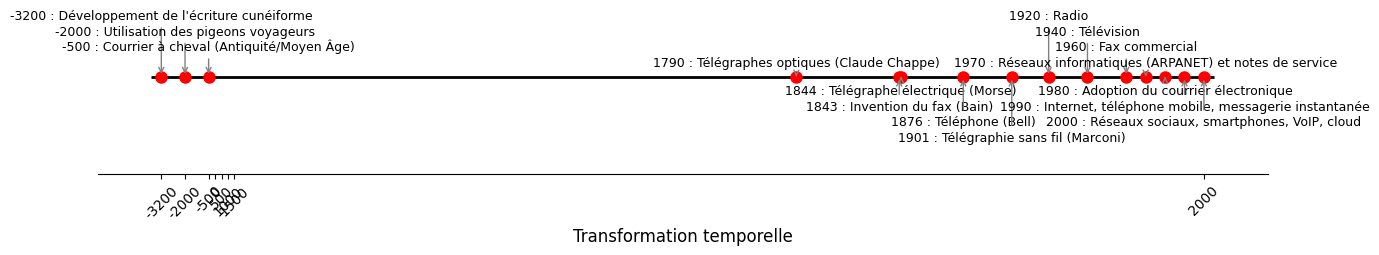

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les bornes temporelles et le pivot
min_year = -3200   # La plus ancienne date
pivot = 1500       # Date de transition
max_year = 2000    # La date la plus récente

# Paramètres pour la partie linéaire (après pivot)
# On souhaite que max_year (2000) soit, par exemple, à 10.0 sur l'axe transformé.
f_pivot = np.log(1 + (pivot - min_year) / (pivot - min_year))  # log(2) ≈ 0.6931
target_positive = 10
scale = (target_positive - f_pivot) / (max_year - pivot)  # Coefficient pour la partie linéaire

def transform_year(x):
    """Transformation piecewise de l'année x.
    Pour x <= pivot, on utilise une échelle logarithmique.
    Pour x > pivot, on utilise une échelle linéaire.
    """
    if x <= pivot:
        return np.log(1 + (x - min_year) / (pivot - min_year))
    else:
        return f_pivot + scale * (x - pivot)

# Liste des événements (année, description)
events = [
    (-3200, "Développement de l'écriture cunéiforme"),
    (-2000, "Utilisation des pigeons voyageurs"),
    (-500, "Courrier à cheval (Antiquité/Moyen Âge)"),
    (1790, "Télégraphes optiques (Claude Chappe)"),
    (1844, "Télégraphe électrique (Morse)"),
    (1843, "Invention du fax (Bain)"),
    (1876, "Téléphone (Bell)"),
    (1901, "Télégraphie sans fil (Marconi)"),
    (1920, "Radio"),
    (1940, "Télévision"),
    (1960, "Fax commercial"),
    (1970, "Réseaux informatiques (ARPANET) et notes de service"),
    (1980, "Adoption du courrier électronique"),
    (1990, "Internet, téléphone mobile, messagerie instantanée"),
    (2000, "Réseaux sociaux, smartphones, VoIP, cloud")
]

# Liste des décalages verticaux pour les annotations répartis sur 8 niveaux
offsets = [0.28, 0.20, 0.12, 0.04, -0.04, -0.12, -0.20, -0.28]

# Baseline pour la timeline
baseline = 8

# Transformer les dates
transformed_years = [transform_year(year) for year, _ in events]

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(14, 3))

# Tracer la ligne horizontale de la timeline au niveau de "baseline"
ax.hlines(baseline, transform_year(min_year) - 0.1, transform_year(max_year) + 0.1, color="black", linewidth=2)

# Afficher chaque événement et répartir les annotations sur plusieurs niveaux
for i, (year, label) in enumerate(events):
    x_val = transform_year(year)
    offset = offsets[i % len(offsets)]
    va = "bottom" if offset >= 0 else "top"
    # Placer le point sur la timeline
    ax.plot(x_val, baseline, "o", markersize=8, color="red")
    # Annoter avec une flèche, en positionnant le texte en fonction du décalage
    ax.annotate(f"{year} : {label}",
                xy=(x_val, baseline),
                xytext=(x_val, baseline + offset),
                textcoords="data",
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="gray"),
                fontsize=9,
                ha="center",
                va=va)

# Masquer l'axe vertical et supprimer les spines inutiles
ax.set_yticks([])
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Ajuster la limite verticale pour laisser de la place aux annotations
ax.set_ylim(baseline - 0.5, baseline + 0.1)
ax.set_xlabel("Transformation temporelle", fontsize=12)

# Définir des graduations personnalisées pour quelques dates clés
ticks = [min_year, -2000, -500, 0, 500, 1000, 1500, 2000]
tick_labels = [str(t) for t in ticks]
transformed_ticks = [transform_year(t) for t in ticks]
ax.set_xticks(transformed_ticks)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=10)

plt.tight_layout()
plt.show()


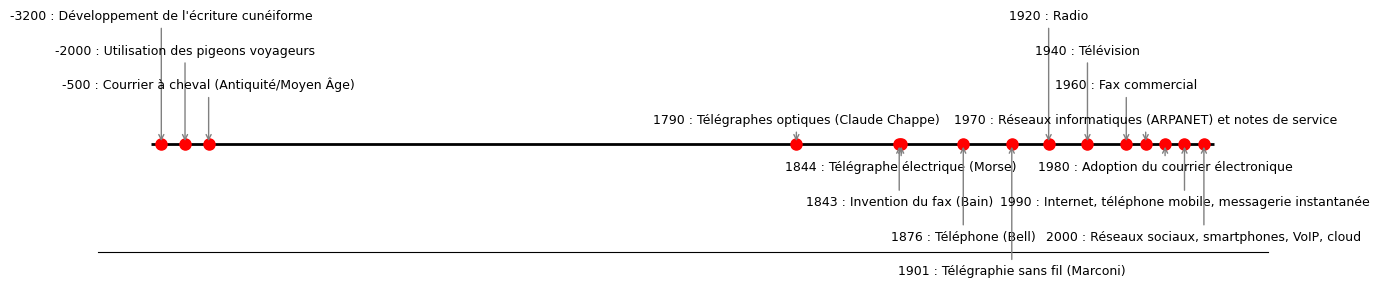

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les bornes temporelles et le pivot
min_year = -3200   # La plus ancienne date
pivot = 1500       # Date de transition
max_year = 2000    # La date la plus récente

# Paramètres pour la partie linéaire (après pivot)
f_pivot = np.log(1 + (pivot - min_year) / (pivot - min_year))  # log(2) ≈ 0.6931
target_positive = 10
scale = (target_positive - f_pivot) / (max_year - pivot)  # Coefficient pour la partie linéaire

def transform_year(x):
    """Transformation piecewise de l'année x.
    Pour x <= pivot, on utilise une échelle logarithmique.
    Pour x > pivot, on utilise une échelle linéaire.
    """
    if x <= pivot:
        return np.log(1 + (x - min_year) / (pivot - min_year))
    else:
        return f_pivot + scale * (x - pivot)

# Liste des événements (année, description)
events = [
    (-3200, "Développement de l'écriture cunéiforme"),
    (-2000, "Utilisation des pigeons voyageurs"),
    (-500, "Courrier à cheval (Antiquité/Moyen Âge)"),
    (1790, "Télégraphes optiques (Claude Chappe)"),
    (1844, "Télégraphe électrique (Morse)"),
    (1843, "Invention du fax (Bain)"),
    (1876, "Téléphone (Bell)"),
    (1901, "Télégraphie sans fil (Marconi)"),
    (1920, "Radio"),
    (1940, "Télévision"),
    (1960, "Fax commercial"),
    (1970, "Réseaux informatiques (ARPANET) et notes de service"),
    (1980, "Adoption du courrier électronique"),
    (1990, "Internet, téléphone mobile, messagerie instantanée"),
    (2000, "Réseaux sociaux, smartphones, VoIP, cloud")
]

# Variable pour ajuster l'espacement des annotations
offset_factor = 2
base_offsets = [0.28, 0.20, 0.12, 0.04, -0.04, -0.12, -0.20, -0.28]
offsets = [offset_factor * x for x in base_offsets]

# Baseline pour la timeline (position verticale de référence)
baseline = 8

# Transformer les dates
transformed_years = [transform_year(year) for year, _ in events]

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(14, 3))

# Tracer la ligne horizontale de la timeline au niveau de "baseline"
ax.hlines(baseline, transform_year(min_year) - 0.1, transform_year(max_year) + 0.1, color="black", linewidth=2)

# Afficher chaque événement et répartir les annotations sur plusieurs niveaux
for i, (year, label) in enumerate(events):
    x_val = transform_year(year)
    offset = offsets[i % len(offsets)]
    va = "bottom" if offset >= 0 else "top"
    ax.plot(x_val, baseline, "o", markersize=8, color="red")
    ax.annotate(f"{year} : {label}",
                xy=(x_val, baseline),
                xytext=(x_val, baseline + offset),
                textcoords="data",
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="gray"),
                fontsize=9,
                ha="center",
                va=va)

# Masquer l'axe vertical et supprimer les spines inutiles
ax.set_yticks([])
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Supprimer l'affichage de l'axe des x
ax.xaxis.set_visible(False)

# Ajuster la limite verticale pour laisser plus d'espace pour les annotations
ax.set_ylim(baseline - 0.5, baseline + 0.5)
ax.set_xlabel("Transformation temporelle", fontsize=12)

plt.tight_layout()
plt.show()
